In [1]:
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
np.shape(x_train)

(60000, 28, 28)

In [3]:
print np.shape(y_train)
print y_train[0:10]

(60000,)
[5 0 4 1 9 2 1 3 1 4]


### [One-hot encoding](https://en.wikipedia.org/wiki/One-hot)
![](https://drive.google.com/uc?id=1C4-g8Rus_DJ6cxN1NXf5HFrEUNu2oHtL)

In [4]:
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train) 
y_train_onehot[:3]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [5]:
x_train_1D = x_train.reshape(60000, 28*28)
np.shape(x_train_1D)

(60000, 784)

In [25]:
x_train_norm = x_train_1D.astype('float32')
x_train_norm = x_train_norm/255

In [29]:
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=10, input_shape=(28*28,), activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='mse', optimizer='SGD', metrics=['accuracy'])
train_history = model.fit(x=x_train_norm, y=y_train_onehot, batch_size=100, epochs=10)

![](https://drive.google.com/uc?id=1Pyd1JZA-HdG0n2J9_TxFuGx7xxAuXK7O)
[source - Introduction of Deep Learning, p21, 李宏毅](http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017/Lecture/DL.pdf)

* activation - [softmax](https://www.youtube.com/watch?v=hSXFuypLukA&feature=youtu.be&list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49&t=3005)
* loss - [cross_entropy](https://www.youtube.com/watch?v=tRsSi_sqXjI&feature=youtu.be&t=36) ([categorical_crossentropy in keras
](https://keras.io/losses/#categorical_crossentropy))

### Cross entroy vs Square error
![](https://drive.google.com/uc?id=1ZMRRk_7MRY9m2Xe-gEhqEIG19c0zVKFk)
[source - Classification Logistic Regression, p24, 李宏毅][1]
[1]:http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017/Lecture/Logistic%20Regression%20(v4).pdf

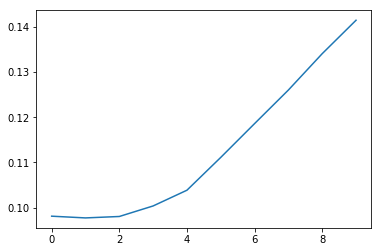

In [23]:
from matplotlib import pyplot as plt
plt.plot(train_history.history['acc'])
plt.show()

In [13]:
np.shape(x_test)

(10000, 28, 28)

In [14]:
x_test_1D = x_test.reshape(10000, 28*28)
x_test_norm = x_test_1D/255

In [24]:
y_test_onehot = np_utils.to_categorical(y_test) 

In [16]:
model.evaluate(x=x_test_1D, y=y_test_onehot)

10000/10000 [==============================] - 0s 48us/step


[0.089279126548767088, 0.20599999999999999]

In [17]:
model.predict(x_test_1D[0:1,:])

array([[ 0.03342062,  0.06762495,  0.19201548,  0.12717244,  0.10812013,
         0.06735042,  0.1003789 ,  0.11153805,  0.12030794,  0.07207104]], dtype=float32)

In [18]:
model.predict_classes(x_test_1D[0:1,:])

array([2])

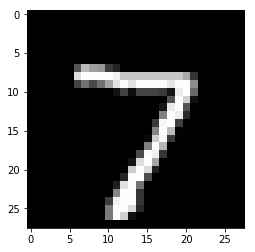

In [22]:
plt.imshow(x_test[0])
plt.gray()